Data Sources </br>
<ul>
<li>https://catalog.data.gov/dataset/national-obesity-by-state-d765a</li>
<li>GPT-4 Generated Data for State_Data containing States, Region, Political View, Total Number of Months with temperatures in 60 -75F range</li>
</ul>
Obesity Index (Obesity) here represents The percent of the state population that is considered obese from the 2015 CDC BRFSS Survey.

In [17]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Importing Data
ObI = pd.read_csv('LCH_OBI.csv')
Sd = pd.read_csv('State_Data.csv')

#### *_Preparing Data_*

In [27]:
#Cleaning for consistent variable naming for data sets
ObI.rename(columns={'NAME':'State'}, inplace=True)
ObI.drop(columns=['OBJECTID','Shape__Area','Shape__Length'], inplace=True)

In [28]:
#Checking for row differences
result = ObI[~ObI['State'].isin(Sd['State'])]
print(result)

                   State  Obesity
35  District of Columbia     22.1
38           Puerto Rico     29.5


In [29]:
#Cleaning for consistency - dropping DC & Puerto Rico
ObI.drop([35,38], inplace=True) 

In [30]:
#Joining tables
data = pd.merge(ObI, Sd, on='State', how='inner')

#### *_Analysis 1: Obesity & Months of Outdoor Friendly Temperature_*

Let's see if we have a correlation between Obesity Index and Number of months that have Outdoor exercise friendly temperatures 60 - 75F. 
On a side note, running a Linear Regression between the two variables would have an R^2 of approximately 0.43, which means 43% can be explained by the linear model.

In [31]:
print (data.columns)

Index(['State', 'Obesity', 'Region', 'Political View',
       'Months with Temps Between 60-75°F'],
      dtype='object')


In [32]:
corrOT = data['Obesity'].corr(data['Months with Temps Between 60-75°F'])

In [33]:
print(f"Correlation between Obesity and No: Outdoor friendly months: {round(corrOT,2)}")

Correlation between Obesity and No: Outdoor friendly months: -0.66


Our results show a moderately negtaive correleation between the two variables which means an increase in total number of months annualy with great weather and temperature would decrease the percentage of people that are obese in a given state. This could be the result of more people getting the opportunity to exercise outdoors when temperatures are not extreme.

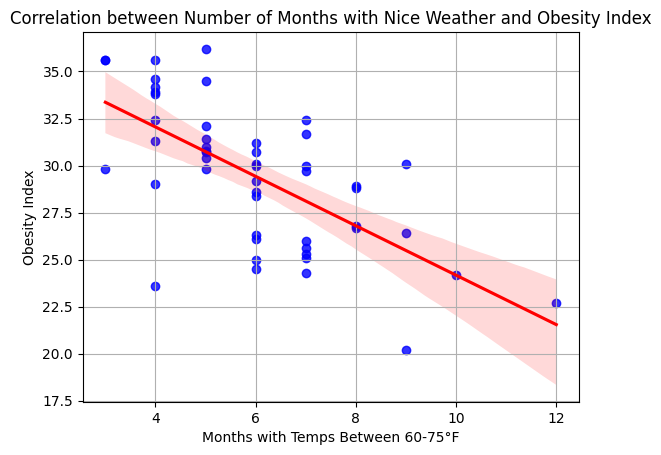

In [35]:
sns.regplot(x='Months with Temps Between 60-75°F', y='Obesity', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Number of Months with Nice Weather and Obesity Index')
plt.xlabel('Months with Temps Between 60-75°F')
plt.ylabel('Obesity Index')
plt.grid(True)
plt.show()

Next we will see plot a residual graph to see if the linear model of measuring correleation is valid

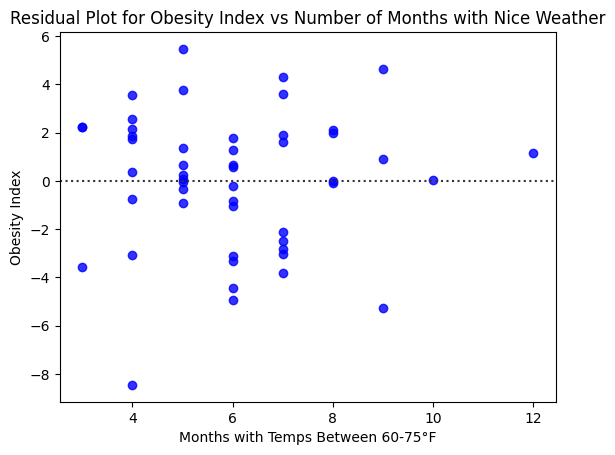

In [37]:
sns.residplot(x=data['Months with Temps Between 60-75°F'], y=data['Obesity'], color='blue', line_kws={"color": "red", "lw": 2})
plt.title('Residual Plot for Obesity Index vs Number of Months with Nice Weather')
plt.xlabel('Months with Temps Between 60-75°F')
plt.ylabel('Obesity Index')
plt.show()

The points are pretty much scattered randomly around the mean, which means the linear relationship between those two fits reasonably, though not the most perfect. This is to be expected since there are multiple varibles that affecting obesity such as diet, and this correleation here only captures going outdoors with the assumption that people will excercise in an awesome weather.

#### *_Analysis 2: Obesity & Political View_*

Does political view affects how the percentage of obesity in that state? Unfortunately, for this dataset we do not have more data such as the BMI to capture a more accurate data, but what we do have is the percentage of people that are obese in the state given by our "ObI" variable. We can measure using a relative way by using median (instead of mean to prevent extreme values from skewing the data) of all the states to draw a line; anything above the median would be assumed as having an increased obesity percentage population in comparsion to other states.

In [38]:
# Getting the Median
median_ObI = data['Obesity'].median()
print (median_ObI)

29.9


In [39]:
# Assigning High to ObI of those higher than median
data['Obesity_Risk'] = np.where(data['Obesity'] > 29.9, 'High', 'Average/Low')

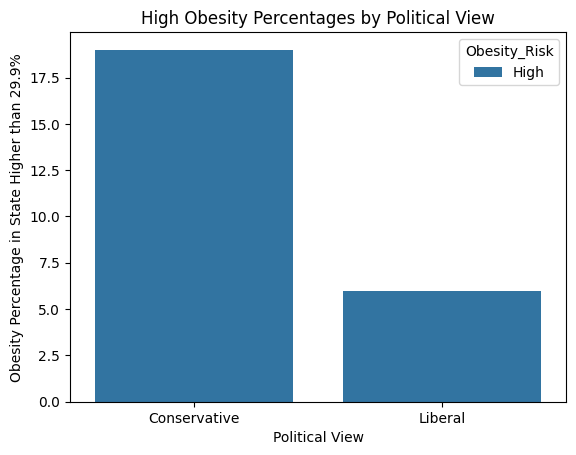

In [40]:
sns.countplot(x='Political View', hue='Obesity_Risk', data=data, hue_order=['High'])
plt.title('High Obesity Percentages by Political View')
plt.xlabel('Political View')
plt.ylabel('Obesity Percentage in State Higher than 29.9%')
plt.show()

Based on the chart we can see that Conservative states generally have relatively higher obesity percentage than liberal states. Before we jump to conclusions we have to note there are several other things at play like poverty rates, access to healthcare, healthier lifestyle options, government policies promoting wellness, etc. While political ideology plays a role, socio-economic conditions, education, and cultural attitudes toward health also significantly impact obesity rates.